## WordCloud

- Many times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called Tag Cloud or WordCloud. For this tutorial, you will learn how to create a WordCloud of your own in Python and customize it as you see fit


In [1]:
# basic libs
import numpy as np
import pandas as pd
import os
# Visualization libs
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('keywordView')
df2 = df.drop(['campaign_id', 'campaign_name', 'campaign_status', 'campaign_budget', 'ad_group_id', 
         'ad_group_name', 'ad_group_status','ad_group_max_cpc', 'ad_group_max_cpm', 'ad_group_max_cpv', 
         'criteria_id', 'bidding_strategy_type','average_cpm', 'average_cpc', 'average_cpe', 
         'average_cost', 'conversions_from_interactions_rate', 'cost_micros', 'ad_group_criterion_status', 
         'cost_per_conversion', 'ctr', 'view_through_conversions', 'value_per_conversion',
         'date', 'customer_id', 'customer_name', 'quality_score', 'clicks', 'conversions', 
         'conversions_value'], axis=1)
df2.head()

,TimeStamp,keyword,negative_kw,kw_match_type,engagement_rate,engagements,impressions,interaction_rate,interactions,ad_position
0,2021-06-09 00:01:13 UTC,sidral mundet,False,PHRASE,0,0,2,0.500,1,SEARCH_TOP
1,2021-06-09 00:01:13 UTC,sidral mundet,False,PHRASE,0,0,1,1.000,1,SEARCH_TOP
2,2021-06-09 00:01:13 UTC,sidral mundet,False,PHRASE,0,0,1,2.000,2,SEARCH_TOP
3,2021-06-09 00:01:13 UTC,sidral mundet,False,PHRASE,0,0,11,0.091,1,SEARCH_TOP
4,2021-06-09 00:01:13 UTC,refrescos,False,EXACT,0,0,83,0.084,7,SEARCH_TOP


In [3]:
df_g = df2.groupby('keyword')
df3 = df_g.mean().sort_values(by="interactions", ascending=False)
#df3 = df3.iloc[:50, :]
df3['keyword'] = df3.index
df3 = df3.reset_index(drop=True)
df3.head()

,negative_kw,engagement_rate,engagements,impressions,interaction_rate,interactions,keyword
0,False,0.0,0.0,8508.000000,0.082500,1198.500000,promoción
1,False,0.0,0.0,3455.833333,0.026500,222.583333,buen fin
2,False,0.0,0.0,2921.045455,0.029886,153.090909,hotsale
3,False,0.0,0.0,715.726562,0.067477,92.992188,promociones
4,False,0.0,0.0,576.000000,0.102500,91.000000,oferta coca cola


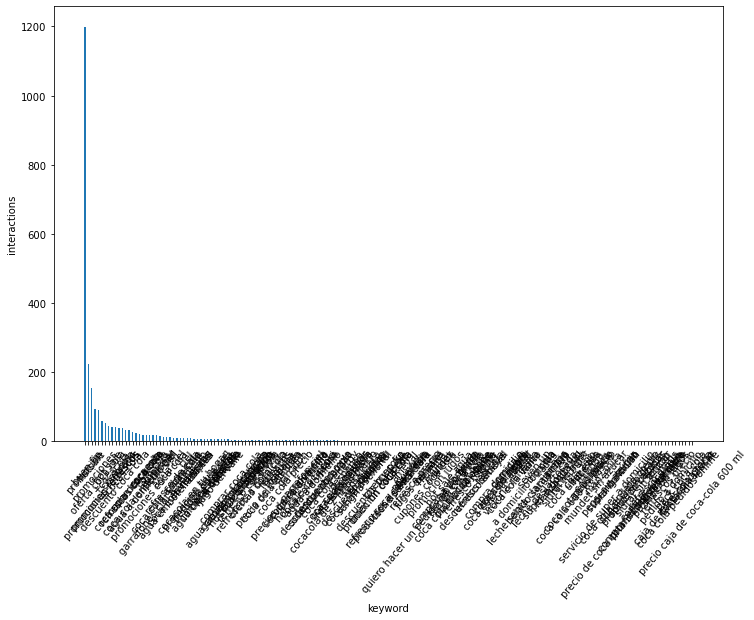

In [4]:
fig = plt.figure(figsize = (12, 8))   

plt.bar(df3.keyword, df3.interactions, width = 0.4) 
plt.xticks(rotation=50)
plt.xlabel("keyword")
plt.ylabel("interactions")
plt.show()

There are 147 keywords in the combination.


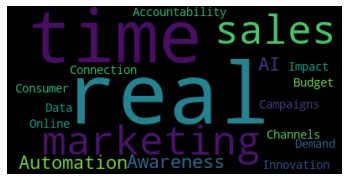

In [26]:
# Start with one review:
#text = " ".join(kw for kw in df3.keyword)
text = 'real-time marketing sales Automation AI Awareness Accountability Budget Campaigns Channels Consumer Connection Data Demand Impact Innovation Online'
print (f"There are {len(text)} keywords in the combination.")

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

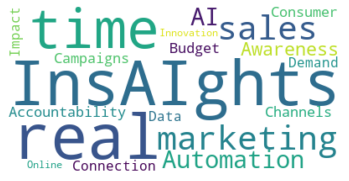

In [15]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["coca", "cola", "cocacola"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The way the masking functions works is that it requires all white part of the mask should be 255 not 0 (integer type). This value represents the "intensity" of the pixel. Values of 255 are pure white, whereas values of 1 are black. Here, you can use the provided function below to transform your mask if your mask has the same format as above. Notice if you have a mask that the background is not 0, but 1 or 2, adjust the function to match your mask.

First, you use the transform_format() function to swap number 0 to 255.

In [27]:
mask = np.array(Image.open("ai_.jpg"))
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

Then, create a new mask with the same shape as the mask you have in hand and apply the function transform_format() to each value in each row of the previous mask.

In [31]:
def transform_format(val):
    if val == 255:
        return 0
    else:
        return val

# Transform your mask into a new one that will work with the function:
transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))

# Check the expected result of your mask
transformed_mask

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

-----

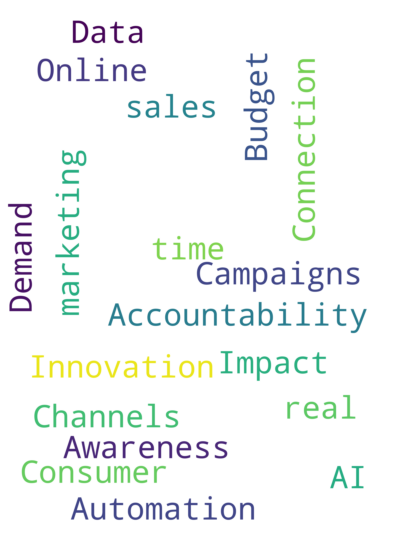

In [29]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_mask,
               stopwords=stopwords, contour_width=1, contour_color='blue')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("image_masked.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

----

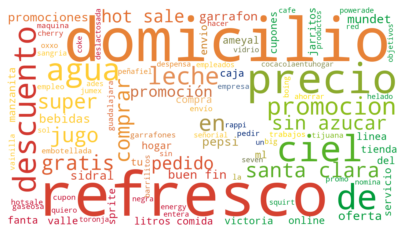

In [129]:
# Generate a word cloud image
mask = np.array(Image.open("br_es.png"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=100, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
#plt.savefig("masked_2", format="png")

plt.show()